# CS498DL Assignment 2

In [ ]:
from google.colab import drive
drive.mount('/content/drive')
# navigate to current directory
!pwd
%cd drive/MyDrive/cs498DL_assignment2/

Mounted at /content/drive
/content
/content/drive/MyDrive/cs498DL_assignment2


In [ ]:
import matplotlib.pyplot as plt
import numpy as np

from kaggle_submission import output_submission_csv
from models.neural_net import NeuralNetwork
from utils.data_process import get_CIFAR10_data

%matplotlib inline
plt.rcParams['figure.figsize'] = (10.0, 8.0)  # set default size of plots

# For auto-reloading external modules
# See http://stackoverflow.com/questions/1907993/autoreload-of-modules-in-ipython
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


## Loading CIFAR-10
Now that you have implemented a neural network that passes gradient checks and works on toy data, you will test your network on the CIFAR-10 dataset.

In [ ]:
# You can change these numbers for experimentation
# For submission be sure they are set to the default values
TRAIN_IMAGES = 49000
VAL_IMAGES = 1000
TEST_IMAGES = 10000

data = get_CIFAR10_data(TRAIN_IMAGES, VAL_IMAGES, TEST_IMAGES)
X_train, y_train = data['X_train'], data['y_train']
X_val, y_val = data['X_val'], data['y_val']
X_test, y_test = data['X_test'], data['y_test']

## Train using SGD (2-layers)
To train our network we will use SGD. In addition, we will adjust the learning rate with an exponential learning rate schedule as optimization proceeds; after each epoch, we will reduce the learning rate by multiplying it by a decay rate.

You can try different numbers of layers and other hyperparameters on the CIFAR-10 dataset below.

In [ ]:
# Hyperparameters
input_size = 32 * 32 * 3
num_layers1 = 2
hidden_size = 100
hidden_sizes1 = [hidden_size] * (num_layers1 - 1)
num_classes = 10
epochs = 30
batch_size = 200
learning_rate = 0.004
learning_rate_decay = 0.95
regularization = 0.03

# Initialize a new neural network model
layer2_sgd = NeuralNetwork(input_size, hidden_sizes1, num_classes, num_layers1)
# Variables to store performance for each epoch
train_loss_sgd1 = np.zeros(epochs)
train_acc_sgd1 = np.zeros(epochs)
val_acc_sgd1 = np.zeros(epochs)

# For each epoch...
train_inds = np.arange(TRAIN_IMAGES)
val_inds = np.arange(VAL_IMAGES)
decay_lr = learning_rate
for epoch in range(epochs):
    print('epoch:', epoch)
    # Shuffle the dataset
    np.random.shuffle(train_inds)
    shuffled_X_train = np.zeros(X_train.shape)
    shuffled_y_train = np.zeros(y_train.shape)
    # shuffling
    for i in range(TRAIN_IMAGES):
        shuffled_X_train[i] = X_train[train_inds[i]]
        shuffled_y_train[i] = y_train[train_inds[i]]
    # Training
    # For each mini-batch...
    for batch in range(TRAIN_IMAGES // batch_size):
        # Create a mini-batch of training data and labels
        first_ind = batch_size * batch
        last_ind = batch_size * (batch+1)
        if last_ind > TRAIN_IMAGES:
            last_ind = TRAIN_IMAGES
        X_batch = shuffled_X_train[first_ind:last_ind]
        y_batch = shuffled_y_train[first_ind:last_ind]
        # Run the forward pass of the model to get a prediction and compute the accuracy
        train_scores_sgd1 = layer2_sgd.forward(X_batch)
        pred_sgd1 = np.argmax(train_scores_sgd1, axis=1)
        train_acc_sgd1[epoch] += (pred_sgd1 == y_batch).sum()
        # Run the backward pass of the model to compute the loss, and update the weights
        loss_sgd1 = layer2_sgd.backward(y_batch, regularization)
        train_loss_sgd1[epoch] += loss_sgd1
        layer2_sgd.update(reg=regularization, opt="SGD", lr=decay_lr)

    # Validation
    # Shuffle the dataset
    np.random.shuffle(val_inds)
    shuffled_X_val = np.zeros(X_val.shape)
    shuffled_y_val = np.zeros(y_val.shape)
    # shuffling
    for i in range(VAL_IMAGES):
        shuffled_X_val[i] = X_val[val_inds[i]]
        shuffled_y_val[i] = y_val[val_inds[i]]    
    # No need to run the backward pass here, just run the forward pass to compute accuracy
    val_scores_sgd1 = layer2_sgd.forward(shuffled_X_val)
    pred_val_sgd1 = np.argmax(val_scores_sgd1, axis=1)
    val_acc_sgd1[epoch] += (pred_val_sgd1 == shuffled_y_val).sum()
    # Implement learning rate decay
    if epoch > 0:
      if epoch % 20 == 0:
        decay_lr = learning_rate*0.1
      elif epoch % 5 == 0:
        decay_lr = learning_rate*0.5

test_scores_sgd1 = layer2_sgd.forward(X_test)
pred_test_sgd1 = np.argmax(test_scores_sgd1, axis=1)
best_2layer_sgd_prediction = (pred_test_sgd1 == y_test).mean()
print("Finished training!")

epoch: 0
epoch: 1
epoch: 2
epoch: 3
epoch: 4
epoch: 5
epoch: 6
epoch: 7
epoch: 8
epoch: 9
epoch: 10
epoch: 11
epoch: 12
epoch: 13
epoch: 14
epoch: 15
epoch: 16
epoch: 17
epoch: 18
epoch: 19
epoch: 20
epoch: 21
epoch: 22
epoch: 23
epoch: 24
epoch: 25
epoch: 26
epoch: 27
epoch: 28
epoch: 29
Finished training!


### Train using SGD (3-layer)

In [ ]:
# Hyperparameters
input_size = 32 * 32 * 3
num_layers2 = 3
hidden_size = 120
hidden_sizes2 = [hidden_size] * (num_layers2 - 1)
num_classes = 10
epochs = 25
batch_size = 200
learning_rate = 0.007
learning_rate_decay = 0.95
regularization = 0.02

# Initialize a new neural network model
layer3_sgd = NeuralNetwork(input_size, hidden_sizes2, num_classes, num_layers2)
# Variables to store performance for each epoch
train_loss_sgd2 = np.zeros(epochs)
train_acc_sgd2 = np.zeros(epochs)
val_acc_sgd2 = np.zeros(epochs)
# For each epoch...
train_inds = np.arange(TRAIN_IMAGES)
val_inds = np.arange(VAL_IMAGES)
decay_lr = learning_rate
for epoch in range(epochs):
    print('epoch:', epoch)
    # Shuffle the dataset
    np.random.shuffle(train_inds)
    shuffled_X_train = np.zeros(X_train.shape)
    shuffled_y_train = np.zeros(y_train.shape)
    # shuffling
    for i in range(TRAIN_IMAGES):
        shuffled_X_train[i] = X_train[train_inds[i]]
        shuffled_y_train[i] = y_train[train_inds[i]]
    # Training
    # For each mini-batch...
    for batch in range(TRAIN_IMAGES // batch_size):
        # Create a mini-batch of training data and labels
        first_ind = batch_size * batch
        last_ind = batch_size * (batch+1)
        if last_ind > TRAIN_IMAGES:
            last_ind = TRAIN_IMAGES
        X_batch = shuffled_X_train[first_ind:last_ind]
        y_batch = shuffled_y_train[first_ind:last_ind]
        # Run the forward pass of the model to get a prediction and compute the accuracy
        train_scores_sgd2 = layer3_sgd.forward(X_batch)
        pred_sgd2 = np.argmax(train_scores_sgd2, axis=1)
        train_acc_sgd2[epoch] += (pred_sgd2 == y_batch).sum()
        # Run the backward pass of the model to compute the loss, and update the weights
        loss_sgd2 = layer3_sgd.backward(y_batch, regularization)
        train_loss_sgd2[epoch] += loss_sgd2
        layer3_sgd.update(reg=regularization, opt="SGD", lr=decay_lr)

    # Validation
    # Shuffle the dataset
    np.random.shuffle(val_inds)
    shuffled_X_val = np.zeros(X_val.shape)
    shuffled_y_val = np.zeros(y_val.shape)
    # shuffling
    for i in range(VAL_IMAGES):
        shuffled_X_val[i] = X_val[val_inds[i]]
        shuffled_y_val[i] = y_val[val_inds[i]]    
    # No need to run the backward pass here, just run the forward pass to compute accuracy
    val_scores_sgd2 = layer3_sgd.forward(shuffled_X_val)
    pred_val_sgd2 = np.argmax(val_scores_sgd2, axis=1)
    val_acc_sgd2[epoch] += (pred_val_sgd2 == shuffled_y_val).sum()
    # Implement learning rate decay
    if epoch > 0:
      if epoch % 20 == 0:
        decay_lr = learning_rate*0.1
      elif epoch % 5 == 0:
        decay_lr = learning_rate*0.5

test_scores_sgd2 = layer3_sgd.forward(X_test)
pred_test_sgd2 = np.argmax(test_scores_sgd2, axis=1)
best_3layer_sgd_prediction = (pred_test_sgd2 == y_test).mean()
print("Finished training!")

epoch: 0
epoch: 1
epoch: 2
epoch: 3
epoch: 4
epoch: 5
epoch: 6
epoch: 7
epoch: 8
epoch: 9
epoch: 10
epoch: 11
epoch: 12
epoch: 13
epoch: 14
epoch: 15
epoch: 16
epoch: 17
epoch: 18
epoch: 19
epoch: 20
epoch: 21
epoch: 22
epoch: 23
epoch: 24
Finished training!


In [ ]:
print("train accuracy of 2-layer SGD: ", (train_acc_sgd1/TRAIN_IMAGES)[-1])
print("validation accuracy of 2-layer SGD: ",(val_acc_sgd1/VAL_IMAGES)[-1])
print("train accuracy of 3-layer SGD: ", (train_acc_sgd2/TRAIN_IMAGES)[-1])
print("validation accuracy of 3-layer SGD: ",(val_acc_sgd2/VAL_IMAGES)[-1])

train accuracy of 2-layer SGD:  0.489469387755102
validation accuracy of 2-layer SGD:  0.483
train accuracy of 3-layer SGD:  0.49751020408163266
validation accuracy of 3-layer SGD:  0.473


In [ ]:
print("test accuracy of 2-layer SGD: ", best_2layer_sgd_prediction)
print("test accuracy of 3-layer SGD: ", best_3layer_sgd_prediction)

test accuracy of 2-layer SGD:  0.4746
test accuracy of 3-layer SGD:  0.4776


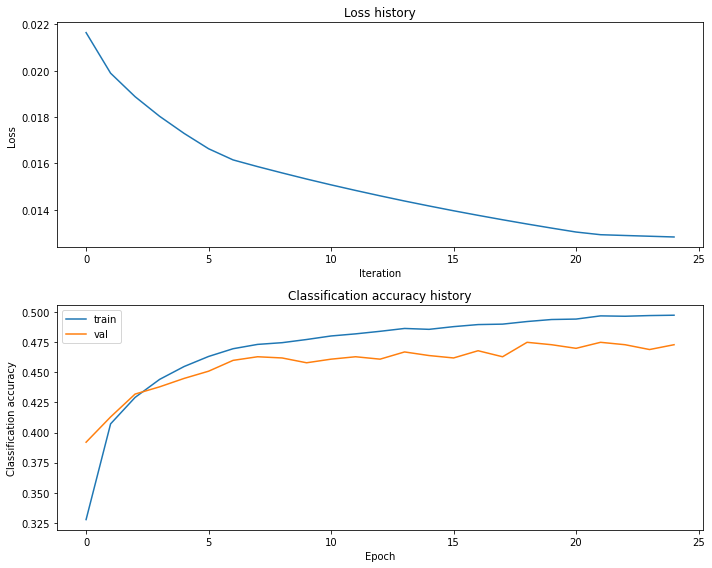

In [ ]:
# Plot the loss function and train / validation accuracies
plt.subplot(2, 1, 1)
plt.plot(train_loss_sgd2/TRAIN_IMAGES)
plt.title('Loss history')
plt.xlabel('Iteration')
plt.ylabel('Loss')

plt.subplot(2, 1, 2)
plt.plot(train_acc_sgd2/TRAIN_IMAGES, label='train')
plt.plot(val_acc_sgd2/VAL_IMAGES, label='val')
plt.title('Classification accuracy history')
plt.xlabel('Epoch')
plt.ylabel('Classification accuracy')
plt.legend()

plt.tight_layout()
plt.show()

## Train using Adam (2-layer)
Next we will train the same model using the Adam optimizer. You should take the above code for SGD and modify it to use Adam instead. For implementation details, see the lecture slides. The original paper that introduced Adam is also a good reference, and contains suggestions for default values: https://arxiv.org/pdf/1412.6980.pdf

In [ ]:
# Hyperparameters
input_size = 32 * 32 * 3
num_layers1 = 2
hidden_size = 30
hidden_sizes1 = [hidden_size] * (num_layers1 - 1)
num_classes = 10
epochs = 25
batch_size = 200
learning_rate = 1e-3
learning_rate_decay = 0.95
regularization = 0.05

# Initialize a new neural network model
layer2_adam = NeuralNetwork(input_size, hidden_sizes1, num_classes, num_layers1)
# Variables to store performance for each epoch
train_loss_adam1 = np.zeros(epochs)
train_acc_adam1 = np.zeros(epochs)
val_acc_adam1 = np.zeros(epochs)
# For each epoch...
train_inds = np.arange(TRAIN_IMAGES)
val_inds = np.arange(VAL_IMAGES)
decay_lr = learning_rate
for epoch in range(epochs):
    print('epoch:', epoch)
    # Shuffle the dataset
    np.random.shuffle(train_inds)
    shuffled_X_train = np.zeros(X_train.shape)
    shuffled_y_train = np.zeros(y_train.shape)
    # shuffling
    for i in range(TRAIN_IMAGES):
        shuffled_X_train[i] = X_train[train_inds[i]]
        shuffled_y_train[i] = y_train[train_inds[i]]
    # Training
    # For each mini-batch...
    for batch in range(TRAIN_IMAGES // batch_size):
        # Create a mini-batch of training data and labels
        first_ind = batch_size * batch
        last_ind = batch_size * (batch+1)
        if last_ind > TRAIN_IMAGES:
            last_ind = TRAIN_IMAGES
        X_batch = shuffled_X_train[first_ind:last_ind]
        y_batch = shuffled_y_train[first_ind:last_ind]
        # Run the forward pass of the model to get a prediction and compute the accuracy
        train_scores_adam1 = layer2_adam.forward(X_batch)
        pred_adam1 = np.argmax(train_scores_adam1, axis=1)
        train_acc_adam1[epoch] += (pred_adam1 == y_batch).sum()
        # Run the backward pass of the model to compute the loss, and update the weights
        loss_adam1 = layer2_adam.backward(y_batch, regularization)
        train_loss_adam1[epoch] += loss_adam1
        layer2_adam.update(reg=regularization, opt="Adam", lr=decay_lr)
    # Validation
    # Shuffle the dataset
    np.random.shuffle(val_inds)
    shuffled_X_val = np.zeros(X_val.shape)
    shuffled_y_val = np.zeros(y_val.shape)
    # shuffling
    for i in range(VAL_IMAGES):
        shuffled_X_val[i] = X_val[val_inds[i]]
        shuffled_y_val[i] = y_val[val_inds[i]]    
    # No need to run the backward pass here, just run the forward pass to compute accuracy
    val_scores_adam1 = layer2_adam.forward(shuffled_X_val)
    pred_val_adam1 = np.argmax(val_scores_adam1, axis=1)
    val_acc_adam1[epoch] += (pred_val_adam1 == shuffled_y_val).sum()
    # Implement learning rate decay
    if epoch > 0:
      if epoch % 20 == 0:
        decay_lr = learning_rate*0.1
      elif epoch % 5 == 0:
        decay_lr = learning_rate*0.5

test_scores_adam1 = layer2_adam.forward(X_test)
pred_test_adam1 = np.argmax(test_scores_adam1, axis=1)
best_2layer_adam_prediction = (pred_test_adam1 == y_test).mean()
print("Finished training!")

epoch: 0
epoch: 1
epoch: 2
epoch: 3
epoch: 4
epoch: 5
epoch: 6
epoch: 7
epoch: 8
epoch: 9
epoch: 10
epoch: 11
epoch: 12
epoch: 13
epoch: 14
epoch: 15
epoch: 16
epoch: 17
epoch: 18
epoch: 19
epoch: 20
epoch: 21
epoch: 22
epoch: 23
epoch: 24
Finished training!


## Train using Adam (3-layer)

In [ ]:
# Hyperparameters
input_size = 32 * 32 * 3
num_layers2 = 3
hidden_size = 100
hidden_sizes2 = [hidden_size] * (num_layers2 - 1)
num_classes = 10
epochs = 30
batch_size = 200
learning_rate = 1e-3
learning_rate_decay = 0.95
regularization = 0.03

# Initialize a new neural network model
layer3_adam = NeuralNetwork(input_size, hidden_sizes2, num_classes, num_layers2)
# Variables to store performance for each epoch
train_loss_adam2 = np.zeros(epochs)
train_acc_adam2 = np.zeros(epochs)
val_acc_adam2 = np.zeros(epochs)
# For each epoch...
train_inds = np.arange(TRAIN_IMAGES)
val_inds = np.arange(VAL_IMAGES)
decay_lr = learning_rate
for epoch in range(epochs):
    print('epoch:', epoch)
    # Shuffle the dataset
    np.random.shuffle(train_inds)
    shuffled_X_train = np.zeros(X_train.shape)
    shuffled_y_train = np.zeros(y_train.shape)
    # shuffling
    for i in range(TRAIN_IMAGES):
        shuffled_X_train[i] = X_train[train_inds[i]]
        shuffled_y_train[i] = y_train[train_inds[i]]
    # Training
    # For each mini-batch...
    for batch in range(TRAIN_IMAGES // batch_size):
        # Create a mini-batch of training data and labels
        first_ind = batch_size * batch
        last_ind = batch_size * (batch+1)
        if last_ind > TRAIN_IMAGES:
            last_ind = TRAIN_IMAGES
        X_batch = shuffled_X_train[first_ind:last_ind]
        y_batch = shuffled_y_train[first_ind:last_ind]
        # Run the forward pass of the model to get a prediction and compute the accuracy
        train_scores_adam2 = layer3_adam.forward(X_batch)
        pred_adam2 = np.argmax(train_scores_adam2, axis=1)
        train_acc_adam2[epoch] += (pred_adam2 == y_batch).sum()
        # Run the backward pass of the model to compute the loss, and update the weights
        loss_adam2 = layer3_adam.backward(y_batch, regularization)
        train_loss_adam2[epoch] += loss_adam2
        layer3_adam.update(reg=regularization, opt="Adam", lr=decay_lr)
    # Validation
    # Shuffle the dataset
    np.random.shuffle(val_inds)
    shuffled_X_val = np.zeros(X_val.shape)
    shuffled_y_val = np.zeros(y_val.shape)
    # shuffling
    for i in range(VAL_IMAGES):
        shuffled_X_val[i] = X_val[val_inds[i]]
        shuffled_y_val[i] = y_val[val_inds[i]]    
    # No need to run the backward pass here, just run the forward pass to compute accuracy
    val_scores_adam2 = layer3_adam.forward(shuffled_X_val)
    pred_val_adam2 = np.argmax(val_scores_adam2, axis=1)
    val_acc_adam2[epoch] += (pred_val_adam2 == shuffled_y_val).sum()
    # Implement learning rate decay
    if epoch > 0:
      if epoch % 20 == 0:
        decay_lr = learning_rate*0.1
      elif epoch % 5 == 0:
        decay_lr = learning_rate*0.5

test_scores_adam2 = layer3_adam.forward(X_test)
pred_test_adam2 = np.argmax(test_scores_adam2, axis=1)
best_3layer_adam_prediction = (pred_test_adam2 == y_test).mean()
print("Finished training!")

epoch: 0
epoch: 1
epoch: 2
epoch: 3
epoch: 4
epoch: 5
epoch: 6
epoch: 7
epoch: 8
epoch: 9
epoch: 10
epoch: 11
epoch: 12
epoch: 13
epoch: 14
epoch: 15
epoch: 16
epoch: 17
epoch: 18
epoch: 19
epoch: 20
epoch: 21
epoch: 22
epoch: 23
epoch: 24
epoch: 25
epoch: 26
epoch: 27
epoch: 28
epoch: 29
Finished training!


In [ ]:
print("train accuracy of 2-layer Adam: ", (train_acc_adam1/TRAIN_IMAGES)[-1])
print("validation accuracy of 2-layer Adam: ",(val_acc_adam1/VAL_IMAGES)[-1])
print("train accuracy of 3-layer Adam: ", (train_acc_adam2/TRAIN_IMAGES)[-1])
print("validation accuracy of 3-layer Adam: ",(val_acc_adam2/VAL_IMAGES)[-1])

train accuracy of 2-layer Adam:  0.473
validation accuracy of 2-layer Adam:  0.485
train accuracy of 3-layer Adam:  0.4532040816326531
validation accuracy of 3-layer Adam:  0.453


In [ ]:
print("test accuracy of 2-layer Adam: ", best_2layer_adam_prediction)
print("test accuracy of 3-layer Adam: ", best_3layer_adam_prediction)

test accuracy of 2-layer Adam:  0.4716
test accuracy of 3-layer Adam:  0.4532


## Graph loss and train/val accuracies

Examining the loss graph along with the train and val accuracy graphs should help you gain some intuition for the hyperparameters you should try in the hyperparameter tuning below. It should also help with debugging any issues you might have with your network.

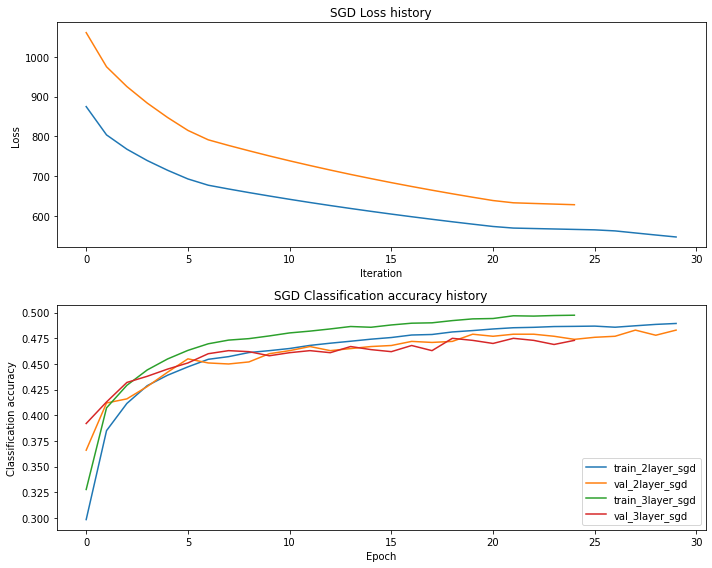

In [ ]:
# SGD: Plot the loss function and train / validation accuracies
plt.subplot(2, 1, 1)
plt.plot(train_loss_sgd1, label='train_2layer_sgd')
plt.plot(train_loss_sgd2, label='train_3layer_sgd')
plt.title('SGD Loss history')
plt.xlabel('Iteration')
plt.ylabel('Loss')

plt.subplot(2, 1, 2)
plt.plot(train_acc_sgd1/TRAIN_IMAGES, label='train_2layer_sgd')
plt.plot(val_acc_sgd1/VAL_IMAGES, label='val_2layer_sgd')
plt.plot(train_acc_sgd2/TRAIN_IMAGES, label='train_3layer_sgd')
plt.plot(val_acc_sgd2/VAL_IMAGES, label='val_3layer_sgd')
plt.title('SGD Classification accuracy history')
plt.xlabel('Epoch')
plt.ylabel('Classification accuracy')
plt.legend()

plt.tight_layout()
plt.show()

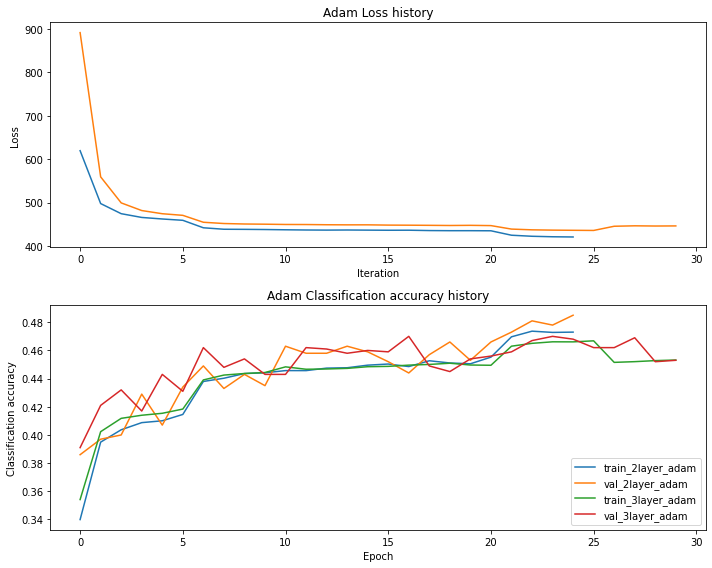

In [ ]:
# Adam: Plot the loss function and train / validation accuracies
plt.subplot(2, 1, 1)
plt.plot(train_loss_adam1, label='train_2layer_adam')
plt.plot(train_loss_adam2, label='train_3layer_adam')
plt.title('Adam Loss history')
plt.xlabel('Iteration')
plt.ylabel('Loss')

plt.subplot(2, 1, 2)
plt.plot(train_acc_adam1/TRAIN_IMAGES, label='train_2layer_adam')
plt.plot(val_acc_adam1/VAL_IMAGES, label='val_2layer_adam')
plt.plot(train_acc_adam2/TRAIN_IMAGES, label='train_3layer_adam')
plt.plot(val_acc_adam2/VAL_IMAGES, label='val_3layer_adam')
plt.title('Adam Classification accuracy history')
plt.xlabel('Epoch')
plt.ylabel('Classification accuracy')
plt.legend()

plt.tight_layout()
plt.show()

## Hyperparameter tuning

Once you have successfully trained a network you can tune your hyparameters to increase your accuracy.

Based on the graphs of the loss function above you should be able to develop some intuition about what hyperparameter adjustments may be necessary. A very noisy loss implies that the learning rate might be too high, while a linearly decreasing loss would suggest that the learning rate may be too low. A large gap between training and validation accuracy would suggest overfitting due to a large model without much regularization. No gap between training and validation accuracy would indicate low model capacity. 

You will compare networks of two and three layers using the different optimization methods you implemented. 

The different hyperparameters you can experiment with are:
- **Batch size**: We recommend you leave this at 200 initially which is the batch size we used. 
- **Number of iterations**: You can gain an intuition for how many iterations to run by checking when the validation accuracy plateaus in your train/val accuracy graph.
- **Initialization** Weight initialization is very important for neural networks. We used the initialization `W = np.random.randn(n) / sqrt(n)` where `n` is the input dimension for layer corresponding to `W`. We recommend you stick with the given initializations, but you may explore modifying these. Typical initialization practices: http://cs231n.github.io/neural-networks-2/#init
- **Learning rate**: Generally from around 1e-4 to 1e-1 is a good range to explore according to our implementation.
- **Learning rate decay**: We recommend a 0.95 decay to start.
- **Hidden layer size**: You should explore up to around 120 units per layer. For three-layer network, we fixed the two hidden layers to be the same size when obtaining the target numbers. However, you may experiment with having different size hidden layers.
- **Regularization coefficient**: We recommend trying values in the range 0 to 0.1. 

Hints:
- After getting a sense of the parameters by trying a few values yourself, you will likely want to write a few for-loops to traverse over a set of hyperparameters.
- If you find that your train loss is decreasing, but your train and val accuracy start to decrease rather than increase, your model likely started minimizing the regularization term. To prevent this you will need to decrease the regularization coefficient. 

## Run on the test set
When you are done experimenting, you should evaluate your final trained networks on the test set.

In [ ]:
print("2layer sgd test accuracy: ", best_2layer_sgd_prediction)
print("3layer sgd test accuracy: ", best_3layer_sgd_prediction)
print("2layer adam test accuracy: ", best_2layer_adam_prediction)
print("3layer adam test accuracy: ", best_3layer_adam_prediction)

2layer sgd test accuracy:  0.4746
3layer sgd test accuracy:  0.4776
2layer adam test accuracy:  0.4716
3layer adam test accuracy:  0.4532


## Kaggle output

Once you are satisfied with your solution and test accuracy, output a file to submit your test set predictions to the Kaggle for Assignment 2 Neural Network. Use the following code to do so:

In [ ]:
output_submission_csv('./nn_2layer_sgd_submission.csv', pred_test_sgd1)
output_submission_csv('./nn_3layer_sgd_submission.csv', pred_test_sgd2)
output_submission_csv('./nn_2layer_adam_submission.csv', pred_test_adam1)
output_submission_csv('./nn_3layer_adam_submission.csv', pred_test_adam2)

## Compare SGD and Adam
Create graphs to compare training loss and validation accuracy between SGD and Adam. The code is similar to the above code, but instead of comparing train and validation, we are comparing SGD and Adam.

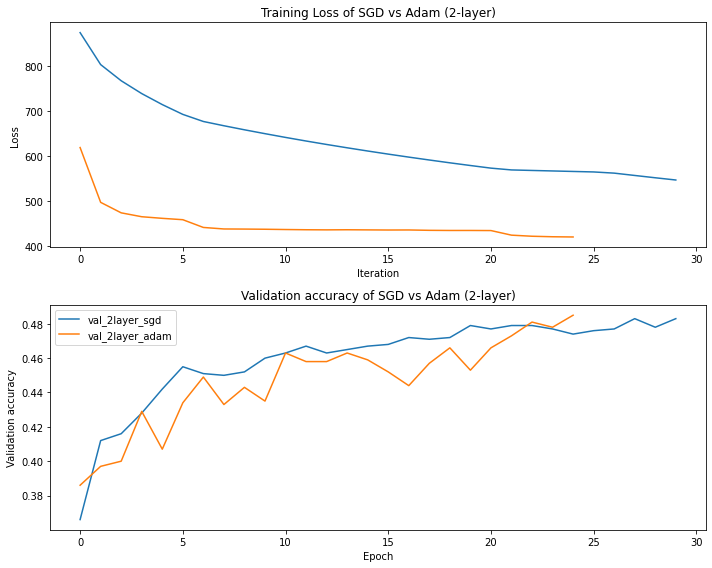

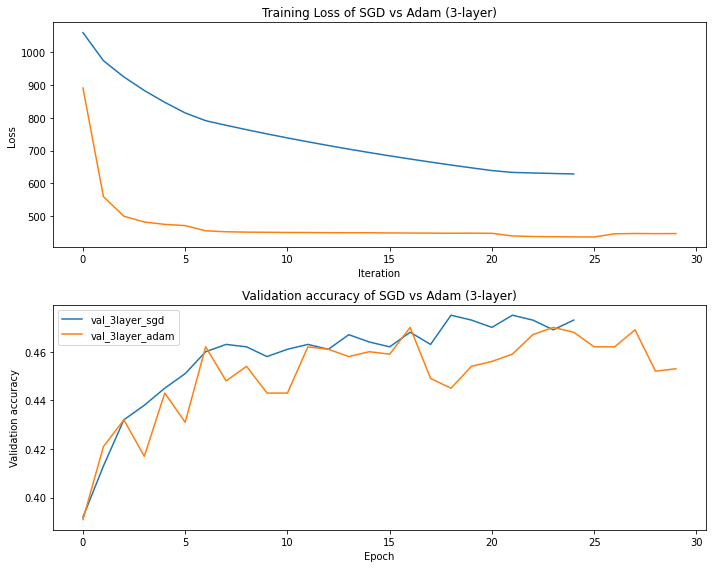

In [ ]:
plt.subplot(2, 1, 1)
plt.plot(train_loss_sgd1, label='train_2layer_sgd')
plt.plot(train_loss_adam1, label='train_2layer_adam')
plt.title('Training Loss of SGD vs Adam (2-layer)')
plt.xlabel('Iteration')
plt.ylabel('Loss')

plt.subplot(2, 1, 2)
plt.plot(val_acc_sgd1/VAL_IMAGES, label='val_2layer_sgd')
plt.plot(val_acc_adam1/VAL_IMAGES, label='val_2layer_adam')
plt.title('Validation accuracy of SGD vs Adam (2-layer)')
plt.xlabel('Epoch')
plt.ylabel('Validation accuracy')
plt.legend()

plt.tight_layout()
plt.show()

plt.subplot(2, 1, 1)
plt.plot(train_loss_sgd2, label='train_3layer_sgd')
plt.plot(train_loss_adam2, label='train_3layer_adam')
plt.title('Training Loss of SGD vs Adam (3-layer)')
plt.xlabel('Iteration')
plt.ylabel('Loss')

plt.subplot(2, 1, 2)
plt.plot(val_acc_sgd2/VAL_IMAGES, label='val_3layer_sgd')
plt.plot(val_acc_adam2/VAL_IMAGES, label='val_3layer_adam')
plt.title('Validation accuracy of SGD vs Adam (3-layer)')
plt.xlabel('Epoch')
plt.ylabel('Validation accuracy')
plt.legend()

plt.tight_layout()
plt.show()